# Practice with R

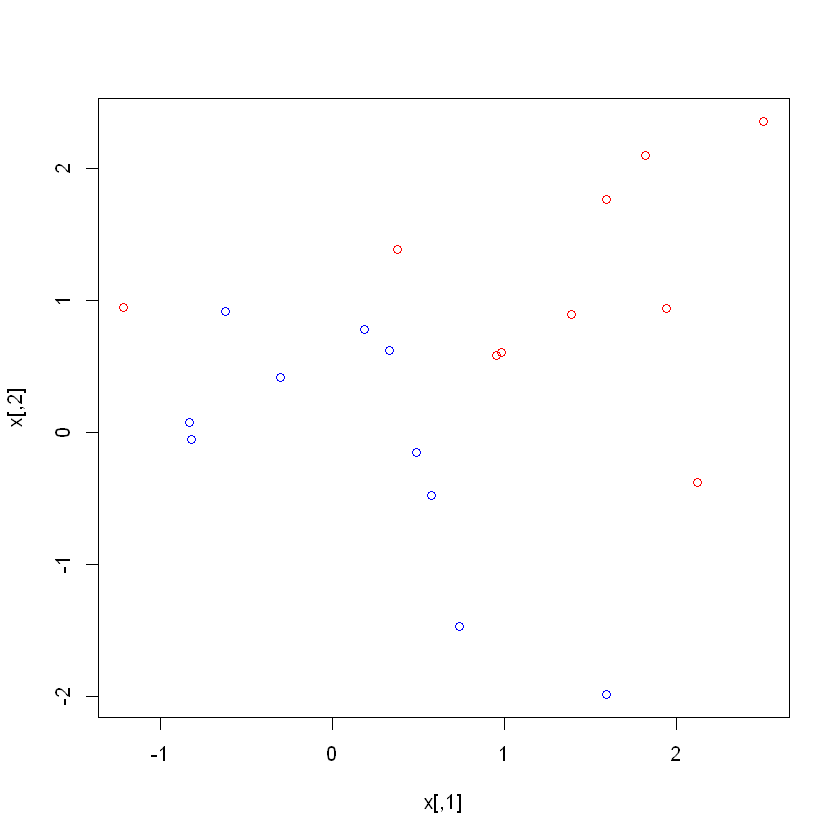

In [1]:
# Set random seed to a fixed value:
set.seed(1)

# Generate a 20x2 matrix contains random values as x:
x = matrix(rnorm(20*2) , ncol=2)

# Generate a 20x1 vector which contains 10 values of -1 and 10 values of 1 as y:
y = c(rep(-1,10), rep(1,10))

# Add 1 to any value of x which leads to y = 1 so that
# they can be well linearly seperated from any value of x which leads to y = -1
x[y==1,] = x[y==1 ,] + 1

# Visualize generated values, here we can see that our sample data is well linearly seperable:
plot(x, col=(3-y))

[1]  1  2  5  7 14 16 17


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




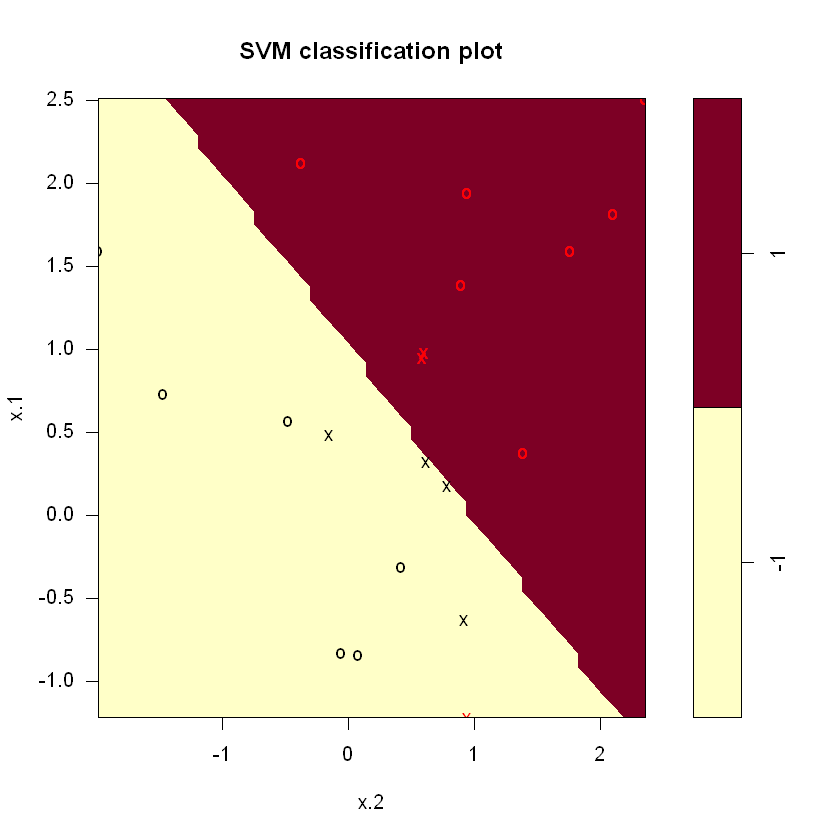

In [2]:
# Support vector classifier

# Create a dataframe of x and y to make training procedure more convenient:
dat = data.frame(x=x, y=as.factor(y))

# Import library for SVM:
library(e1071)

# Fit the SVM model on dat:
# Kernel="linear" means that we don't use any kernel trick to project data to higher dimension
# Cost=10 means that we apply svm with a regularization term of 10 in the Lagrange formulation
# scale=FALSE means that we don't scale values to zero mean and unit variance
svmfit = svm(y~., data=dat, kernel="linear", cost=10, scale=FALSE)

# Visualize the svm:
plot(svmfit, dat)

# Get the index of the resulting support vectors in the data matrix:
svmfit$index

# Get the summary values of the fitted model:
summary(svmfit)
# C-classification means than the svm used a regularization term of type C
# Linear kernel, cost has been explained above
# Number of Support Vectors: 7 means that the svm used 7 support vectors to define the margin of the classifcation.

[1]  1  2  3  4  5  7  9 10 12 13 14 15 16 17 18 20

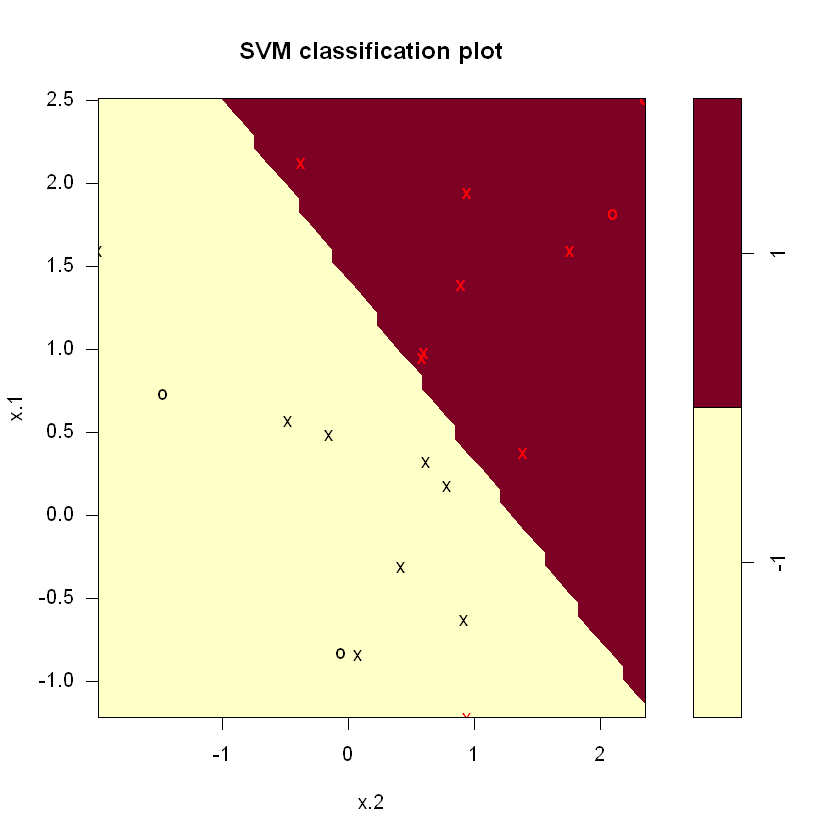

In [3]:
# Fit the SVM model on dat with cost=0.1:
svmfit = svm(y~., data=dat,kernel="linear", cost=0.1, scale=FALSE)

# Visualize:
plot(svmfit, dat)

# Get index of supPort vectors
svmfit$index

In [4]:
# Reset random seed to 1:
set.seed (1)

# Tuning hyperparamater C of the svm:
tune.out = tune(svm, y~., data=dat, kernel = "linear", ranges=list(cost=c(0.001, 0.01, 0.1, 1,5,10,100)))

# Get the summary of tuning result:
summary(tune.out)

# Get the model with best tuning result:
bestmod=tune.out$best.model

# Get the summary of bestmod
summary(bestmod)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.05 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.55  0.4377975
2 1e-02  0.55  0.4377975
3 1e-01  0.05  0.1581139
4 1e+00  0.15  0.2415229
5 5e+00  0.15  0.2415229
6 1e+01  0.15  0.2415229
7 1e+02  0.15  0.2415229



Call:
best.tune(method = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




In [5]:
# Generate test data the same way as training data:
xtest=matrix(rnorm(20*2) , ncol=2)
ytest=sample(c(-1,1), 20, rep=TRUE)
xtest[ytest==1,]=xtest[ytest==1,] + 1
testdat=data.frame(x=xtest, y=as.factor(ytest))

# Get prediction of test data with bestmod:
ypred=predict(bestmod,testdat)

# Calculate confusion matrix
table(predict =ypred, truth=testdat$y)

       truth
predict -1 1
     -1  9 1
     1   2 8

In [6]:
# Fit svm with cost=0.01
svmfit = svm(y~., data=dat, kernel="linear", cost=.01, scale=FALSE)

# Get prediction of test data with the fitted svm:
ypred=predict(svmfit,testdat)

# Calculate confusion matrix:
table(predict=ypred, truth=testdat$y)

       truth
predict -1  1
     -1 11  6
     1   0  3


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1e+05 

Number of Support Vectors:  3

 ( 1 2 )


Number of Classes:  2 

Levels: 
 -1 1





Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




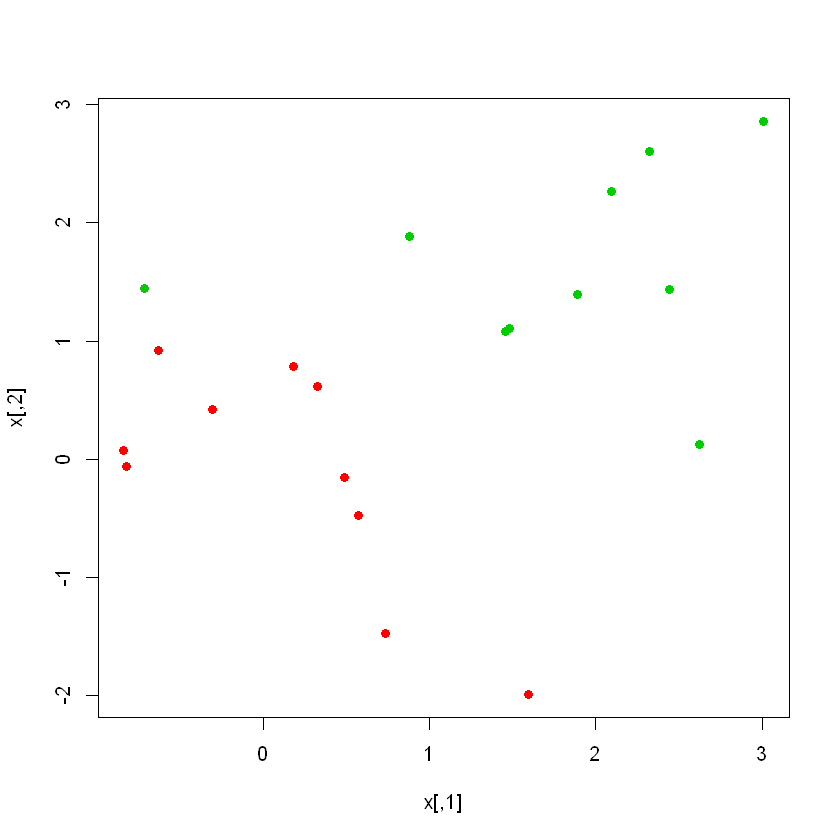

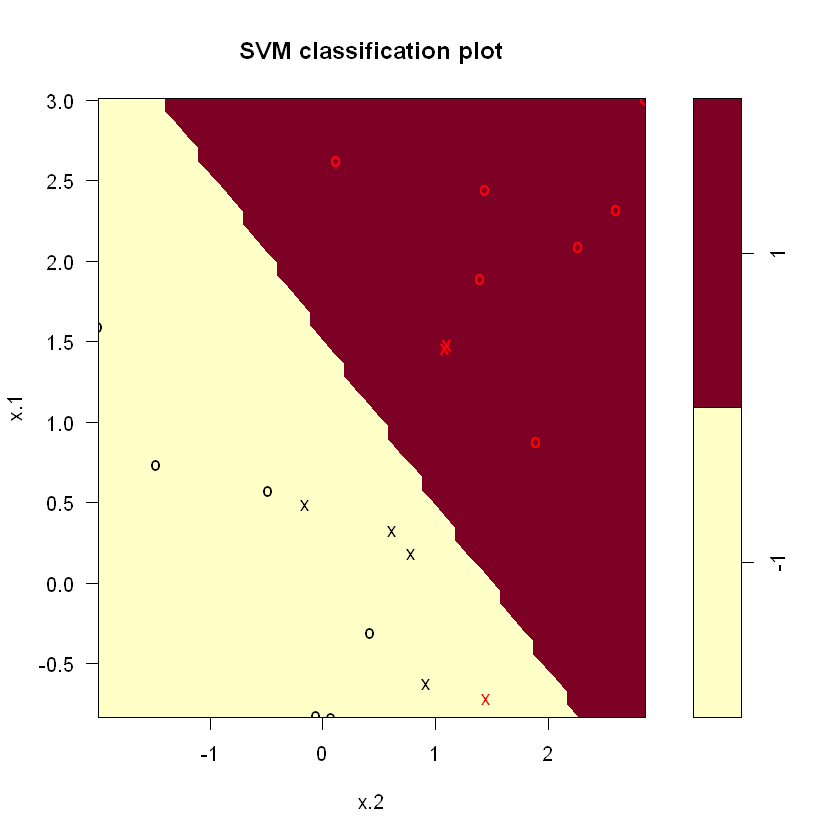

In [7]:
# Added 0.5 to any value of x which leads to y=1:
x[y==1,] = x[y==1,]+0.5

# Visualize new data:
plot(x, col=(y+5)/2, pch=19)

# Create dataframe for new data:
dat = data.frame(x=x,y=as.factor(y))

# Fit svm on new data with cost=1e5:
svmfit=svm(y~., data=dat, kernel="linear", cost=1e5)
summary(svmfit)

# Fit svm on new data with cost=1:
svmfit=svm(y~., data=dat, kernel="linear", cost = 1)
summary(svmfit)

# Visualize fitted svm
plot(svmfit,dat)